# **Text Classification**

---






In [2]:
# Run this cell if you use Colab
# from google.colab import drive
# drive.mount('/content/drive')

Load and read in dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle('consumer_complaint_dataset.data', compression='gzip')

In [2]:
df.head()

,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...


## Distribution

In [3]:
pd.crosstab(df.topic, columns="Count").sort_values(by='Count', ascending=False)

col_0,Count
topic,
"Credit reporting, credit repair services, or other personal consumer reports",145090
Debt collection,106946
Mortgage,61581
Credit card or prepaid card,32144
Credit reporting,31588
Student loan,25083
Checking or savings account,19153
Credit card,18838
Bank account or service,14885


## Group Labels

In [4]:
df.loc[df['topic']=='Credit reporting', 'topic'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['topic']=='Credit card', 'topic'] = 'Credit card or prepaid card'
df.loc[df['topic']=='Prepaid card', 'topic'] = 'Credit card or prepaid card'
df.loc[df['topic']=='Payday load', 'topic'] = 'Payday loan, title loan, or personal loan'
df.loc[df['topic']=='Virtual currency', 'topic'] = 'Money transfer, virtual currency, or money service'
df.loc[df['topic']=='Money transfers', 'topic'] = 'Money transfer, virtual currency, or money service'
df = df[df['topic'] != 'Other financial service']

## Labels after grouping

In [5]:
pd.crosstab(df.topic, columns="Count").sort_values(by='Count', ascending=False)

col_0,Count
topic,
"Credit reporting, credit repair services, or other personal consumer reports",176678
Debt collection,106946
Mortgage,61581
Credit card or prepaid card,52432
Student loan,25083
Checking or savings account,19153
Bank account or service,14885
Consumer Loan,9473
"Money transfer, virtual currency, or money service",9378


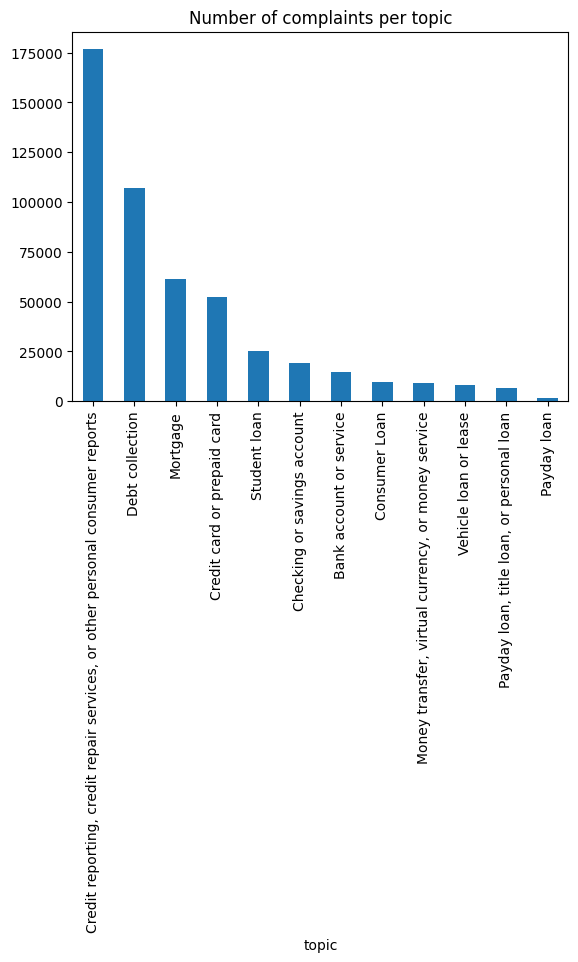

In [6]:
df['topic'].value_counts().sort_values(ascending=False).plot(kind='bar',title='Number of complaints per topic')
plt.show()

## Function to retrieve text

In [7]:
def print_plot(index):
  example = df[df.index == index][['input','topic']].values[0]
  if len(example) > 0:
    print(example[0])
    print('Topic: ',example[1])
print_plot(10)

XXXX is reporting incorrectly to Equifax and XXXX an account balance of {$2300.00} on the XXXX partial account number XXXX. ( Please see pages 12 and 13 of the attached credit report ). This account is over 7 years old and therefore should not be on my credit report. This incorrect reporting is harming my credit score and is a Fair Credit Reporting Act ( F.C.R.A. ) violation.
Topic:  Credit reporting, credit repair services, or other personal consumer reports


## Clean Data

In [8]:
import nltk
# nltk.download('stopwords')

In [9]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [10]:
import re

REPLACE_BY_SPLACE_RE = re.compile(r'[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile(r'[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

## Function to clean text

In [11]:
def clean_text(text):
  text = text.lower()
  text = REPLACE_BY_SPLACE_RE.sub(' ', text)
  text = BAD_SYMBOLS_RE.sub('', text)
  text = text.replace('x', '')
  text = ' '.join(word for word in text.split() if word not in STOPWORDS)
  return text

In [12]:
df['input'] = df['input'].apply(clean_text)

df['input'] = df['input'].str.replace(r'\d+','')

In [13]:
print_plot(10)

reporting incorrectly equifa account balance 230000 partial account number please see pages 12 13 attached credit report account 7 years old therefore credit report incorrect reporting harming credit score fair credit reporting act fcra violation
Topic:  Credit reporting, credit repair services, or other personal consumer reports


# Modeling
1. Vectorize input consumer complaints
2. Limit dataset to top 50000 words
3. Set max number of words in each complaint to 250

## Train Tokenizer

In [19]:
from keras.layers import TextVectorization

MAX_NB_WORDS = 50000

MAX_SEQUENCE_LENGTH = 250

EMBEDDING_DIM = 100

tokenizer = TextVectorization(max_tokens = MAX_NB_WORDS,
                            standardize = 'lower_and_strip_punctuation',
                            output_sequence_length = MAX_SEQUENCE_LENGTH)

tokenizer.adapt(df['input'].values)
word_index = tokenizer.get_vocabulary()
print('Found %s unique tokens.'%len(word_index))

Found 50000 unique tokens.


## Pad sequence

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = tokenizer(df['input'].values)[:2500]
X = pad_sequences(X, maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2500, 250)


In [28]:
df['input'].values[0]

'transworld systems inc trying collect debt mine owed inaccurate'

In [29]:
X[0]

array([2482,  796,  650,  130,  266,    9,  281,  207,  269,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Convert output label into numeric format

In [32]:
Y = pd.get_dummies(df['topic']).values[:2500]
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2500, 12)


In [33]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Split dataset to Training and Test set

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1750, 250) (1750, 12)
(750, 250) (750, 12)


## Construct LSTM Text Classifier

In [71]:
from keras import Input
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs=3
batch_size=64

history = model.fit(X_train, Y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.4564 - loss: 2.0615 - val_accuracy: 0.4743 - val_loss: 1.7783
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.4913 - loss: 1.6329 - val_accuracy: 0.4743 - val_loss: 1.7343
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.4801 - loss: 1.6302 - val_accuracy: 0.4743 - val_loss: 1.7362


## Evaluate the model

In [72]:
acc = model.evaluate(X_test, Y_test)
print('Test set \n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'.format(acc[0], acc[1]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4794 - loss: 1.6047
Test set 
	Loss: 1.664
	Accuracy: 0.461


## Loss

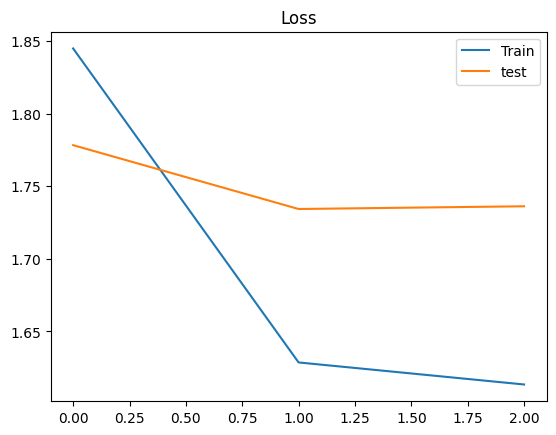

In [73]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Accuracy

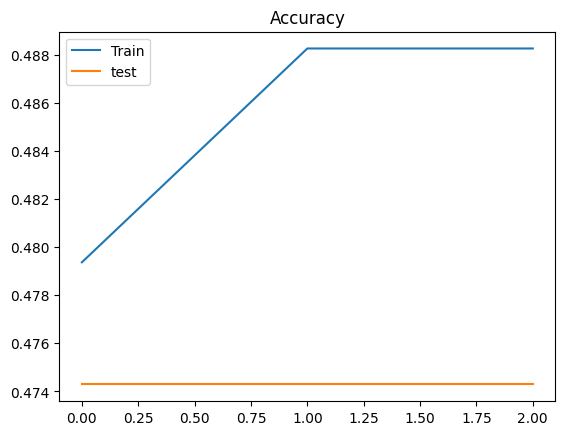

In [74]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Confusion Matrix

In [115]:
labels = pd.get_dummies(df['topic']).columns
list(labels)

['Bank account or service',
 'Checking or savings account',
 'Consumer Loan',
 'Credit card or prepaid card',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Money transfer, virtual currency, or money service',
 'Mortgage',
 'Payday loan',
 'Payday loan, title loan, or personal loan',
 'Student loan',
 'Vehicle loan or lease']

In [111]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(Y_test.argmax(axis=1),
                 y_pred.argmax(axis=1))

# pd.DataFrame(confusion_matrix(Y_test.argmax(axis=1),
#                               y_pred.argmax(axis=1)),
#                             index=labels, columns=labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


array([[  0,   0,   0,  45,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  67,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 346,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 150,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   9,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  67,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  15,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  27,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  21,   0,   0,   0,   0,   0,   0]], dtype=int64)

## Classification Report

In [120]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_true=Y_test.argmax(axis=1),
                            y_pred=y_pred.argmax(axis=1)))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        67
           4       0.46      1.00      0.63       346
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        67
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        27
          11       0.00      0.00      0.00        21

    accuracy                           0.46       750
   macro avg       0.05      0.10      0.06       750
weighted avg       0.21      0.46      0.29       750



c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Test using new complaints


In [118]:
import numpy as np
new_complaint = ['I am a victim of identity theft']
seq = tokenizer(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels=pd.get_dummies(df['topic']).columns.values
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.00150914 0.05369997 0.00129552 0.08324164 0.5267319  0.17313765
  0.01854998 0.07982263 0.00077773 0.01831112 0.0240729  0.01884986]] Credit reporting, credit repair services, or other personal consumer reports
